In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress 

In [52]:
df15 = pd.read_csv('UpdatedState2015.csv')
#adds column 'DeathsNorm', deaths per million in 2015
df15['DeathsNorm'] = (df15['Deaths']*(1e6)/df15['Population'])
df15state=df15[1:51]
df15state

,State,Population,Deaths,UnemRate,UnemRank,Gini,Poverty,Mcdonalds,Mcd10K,DeathsNorm
1,Alabama,4858979,19,6.1,42.0,0.4811,18.5,279,5.74,3.910287
2,Alaska,738432,5,6.5,47.0,0.4322,10.3,31,4.20,6.771104
3,Arizona,6828065,44,6.1,42.0,0.4702,17.4,292,4.28,6.443993
4,Arkansas,2978204,5,5.0,24.0,0.4773,19.1,184,6.18,1.678864
5,California,39144818,211,6.2,44.0,0.4876,15.3,"1,492",3.81,5.390241
6,Colorado,5456574,32,3.9,10.0,0.4580,11.5,237,4.34,5.864486
7,Connecticut,3590886,4,5.7,34.0,0.4916,10.5,157,4.37,1.113931
8,Delaware,945934,7,4.9,22.0,0.4523,12.4,44,4.65,7.400093
9,District of Columbia,672228,4,6.9,51.0,0.5354,17.3,19,2.83,5.950362
10,Florida,20271272,71,5.5,31.0,0.4872,15.7,986,4.86,3.502494


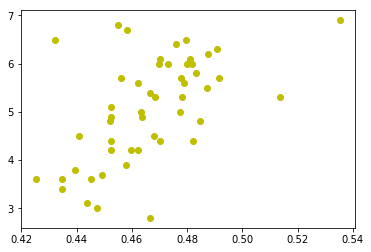

In [53]:
plt.plot(df15state['Gini'],df15state['UnemRate'], 'yo',)

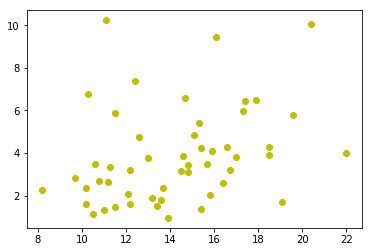

In [24]:
plt.plot(df15['Poverty'],df15['DeathsNorm'], 'yo',)

LinregressResult(slope=4.132472473071178e-06, intercept=-3.7166470986649074, rvalue=0.9027097567138055, pvalue=3.312541665252314e-19, stderr=2.842903587261808e-07)

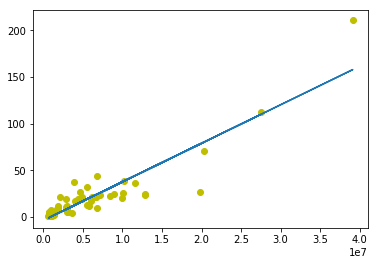

In [60]:
# Regression line and results for populations (predictor variable) to death (response variable)
model = np.polyfit(df15state['Population'], df15state['Deaths'],1)
modelFit = np.poly1d(model)
plt.plot(df15state['Population'],df15state['Deaths'], 'yo',df15state['Population'], modelFit(df15state['Population']))
linregress(df15state['Population'], df15state['Deaths']) #x and y are arrays or lists.

LinregressResult(slope=4.132472473071178e-06, intercept=-3.7166470986649074, rvalue=0.9027097567138055, pvalue=3.312541665252314e-19, stderr=2.842903587261808e-07)